In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
energy = read.csv('data/energy.csv.xz')

In [4]:
str(energy)
summary(energy)

'data.frame':	699 obs. of  27 variables:
 $ STATE                  : Factor w/ 50 levels "AK","AL","AR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ YEAR                   : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ GenTotal               : num  9.81 10.64 10.54 9.79 9.9 ...
 $ GenHydro               : num  0.163 0.2 0.213 0.25 0.23 ...
 $ GenSolar               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ GenTotalRenewable      : num  0.163 0.2 0.214 0.25 0.231 ...
 $ GenSolarBinary         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ GenTotalRenewableBinary: int  1 1 1 0 0 0 1 0 1 1 ...
 $ AllSourcesCO2          : num  7.26 7.31 6.94 6.15 7.25 ...
 $ AllSourcesSO2          : num  0.0224 0.01193 0.01148 0.00675 0.00659 ...
 $ AllSourcesNOx          : num  0.0289 0.0277 0.0294 0.0242 0.0377 ...
 $ EPriceResidential      : num  11.4 12.1 12.1 12 12.4 ...
 $ EPriceCommercial       : num  9.77 10.29 10.13 10.49 10.99 ...
 $ EPriceIndustrial       : num  7.56 7.61 7.65 7.86 8.33 ...
 $ EPriceTransportatio

     STATE          YEAR         GenTotal         GenHydro      
 AK     : 14   Min.   :2000   Min.   : 4.591   Min.   :0.00000  
 AL     : 14   1st Qu.:2003   1st Qu.:10.037   1st Qu.:0.00888  
 AR     : 14   Median :2006   Median :14.647   Median :0.02291  
 AZ     : 14   Mean   :2006   Mean   :16.956   Mean   :0.09853  
 CA     : 14   3rd Qu.:2010   3rd Qu.:18.018   3rd Qu.:0.07041  
 CO     : 14   Max.   :2013   Max.   :92.097   Max.   :0.92076  
 (Other):615                                                    
    GenSolar          GenTotalRenewable GenSolarBinary  
 Min.   :-1.300e-08   Min.   :0.00000   Min.   :0.0000  
 1st Qu.: 0.000e+00   1st Qu.:0.02027   1st Qu.:0.0000  
 Median : 0.000e+00   Median :0.04475   Median :0.0000  
 Mean   : 3.344e-04   Mean   :0.12245   Mean   :0.2318  
 3rd Qu.: 0.000e+00   3rd Qu.:0.10771   3rd Qu.:0.0000  
 Max.   : 2.045e-02   Max.   :0.92076   Max.   :1.0000  
                                                        
 GenTotalRenewableBinary

In [5]:
head(energy)

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
1,AK,2000,9.807319179,0.162724751,0,0.162724751,0,1,7.260626876,0.02239593,,0.421184489,0.19522276,0,0.034255937,8.458760522,1,1,17.64608569,0,0
2,AK,2001,10.64461169,0.199542066,0,0.199682937,0,1,7.311766619,0.011925094,,0.41968783,0.197911105,0,0.035602338,8.608923222,1,1,18.69197034,0,0
3,AK,2002,10.54143158,0.212691278,0,0.214335059,0,1,6.93834174,0.0114771,,0.409521637,0.199040745,0,0.03790713,8.513567528,1,1,19.64402117,0,0
4,AK,2003,9.786962825,0.249661289,0,0.250453087,0,0,6.153593414,0.006750341,,0.444494851,0.198365938,0,0,8.590290441,1,1,20.39238357,0,0
5,AK,2004,9.899389509,0.229521213,0,0.230873807,0,0,7.246256285,0.00659179,,0.449272728,0.194519152,0,0,8.779675567,1,1,21.44678279,0,0
6,AK,2005,9.858373531,0.22259661,0,0.223427123,0,0,6.541565609,0.006048441,,0.455793427,0.195516976,0,NA,8.862909488,2,1,22.71281629,0,0


In [10]:
head(energy[with(energy, order(-GenTotalRenewable)),])

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
169,ID,2000,9.165015717,0.920763058,0,0.920763058,0,0,0.636865696,0.004590802,,0.309530672,0.36820796,0,0.015418038,17.57070613,2,2,12.81242656,0,1
171,ID,2002,7.294405472,0.896023402,0,0.896023402,0,0,0.57639688,0.004229696,,0.336359389,0.306872729,0,0.015897068,15.42789319,2,2,13.42663989,0,1
180,ID,2011,10.46154516,0.809039298,0,0.894609237,0,0,0.520782558,0.002983369,,0.256511378,0.382971025,0,NA,14.69378575,29,5,18.08008357,0,1
175,ID,2006,9.145805876,0.839855118,0,0.852526261,0,0,0.602357425,0.003101875,,0.255394346,0.390613744,0,NA,15.55156252,12,5,17.47959956,0,1
656,WA,2011,16.8954425,0.796595784,7.29e-06,0.852399591,0,0,1.206210188,0.002634521,,0.313778928,0.298029466,7.56e-05,NA,13.73840198,90,14,26.21118259,1,0
181,ID,2012,9.713704022,0.705874068,0,0.838457409,0,0,0.734483796,0.003314135,,0.252115113,0.403780741,0,NA,14.86087215,29,5,18.60291869,0,1


In [11]:
subset(energy, STATE=='ID')

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
169,ID,2000,9.165015717,0.920763058,0,0.920763058,0,0,0.636865696,0.004590802,,0.309530672,0.36820796,0,0.015418038,17.57070613,2,2,12.81242656,0,1
170,ID,2001,7.076775205,0.772779672,0,0.772779672,0,1,0.83355883,0.00284375,,0.310169877,0.346293426,0,0.016197844,15.9722598,2,2,13.07948028,0,1
171,ID,2002,7.294405472,0.896023402,0,0.896023402,0,0,0.57639688,0.004229696,,0.336359389,0.306872729,0,0.015897068,15.42789319,2,2,13.42663989,0,1
172,ID,2003,7.643285922,0.80150495,0,0.80150495,0,0,0.816895852,0.00472841,,0.257619546,0.408253056,0,0,15.55996237,3,3,13.84388887,0,1
173,ID,2004,7.80880466,0.778939945,0,0.778939945,0,1,0.9407732,0.005072147,,0.251460268,0.413171842,0,0,15.67698276,3,3,14.80993648,0,1
174,ID,2005,7.595275416,0.789111651,0,0.789111651,0,1,0.943754184,0.003469625,,0.256969431,0.395212102,0,NA,15.33278301,5,3,15.89418147,0,1
175,ID,2006,9.145805876,0.839855118,0,0.852526261,0,0,0.602357425,0.003101875,,0.255394346,0.390613744,0,NA,15.55156252,12,5,17.47959956,0,1
176,ID,2007,7.664287001,0.785581549,0,0.80058204,0,1,0.856999179,0.004485481,,0.25318943,0.395753205,0,NA,15.85380709,20,5,18.47753731,0,1
177,ID,2008,7.842882929,0.782127693,0,0.806606011,0,1,0.666101245,0.004125022,,0.253062843,0.389648009,0,NA,15.65981019,21,5,18.43713733,0,1
178,ID,2009,8.481999916,0.79649946,0,0.826221864,0,0,0.663131246,0.002992622,,0.263931235,0.360148352,0,NA,14.73246658,25,5,17.56408386,0,1


In [12]:
nona = na.omit(energy)

In [19]:
mean(subset(nona, presidential.results==0)$AllSourcesCO2)
mean(subset(nona, presidential.results==1)$AllSourcesCO2)
mean(subset(nona, presidential.results==0)$AllSourcesNOx)
mean(subset(nona, presidential.results==1)$AllSourcesNOx)

[1] 16.36243

[1] 5.937698

[1] 0.03677806

[1] 0.01244552

In [21]:
cor(energy$AllSourcesCO2, energy$EsalesIndustrial, use='complete')
cor(energy$AllSourcesCO2, energy$EsalesResidential, use='complete')
cor(energy$AllSourcesCO2, energy$EsalesCommercial, use='complete')

[1] 0.5385867

[1] -0.5182692

[1] -0.373383

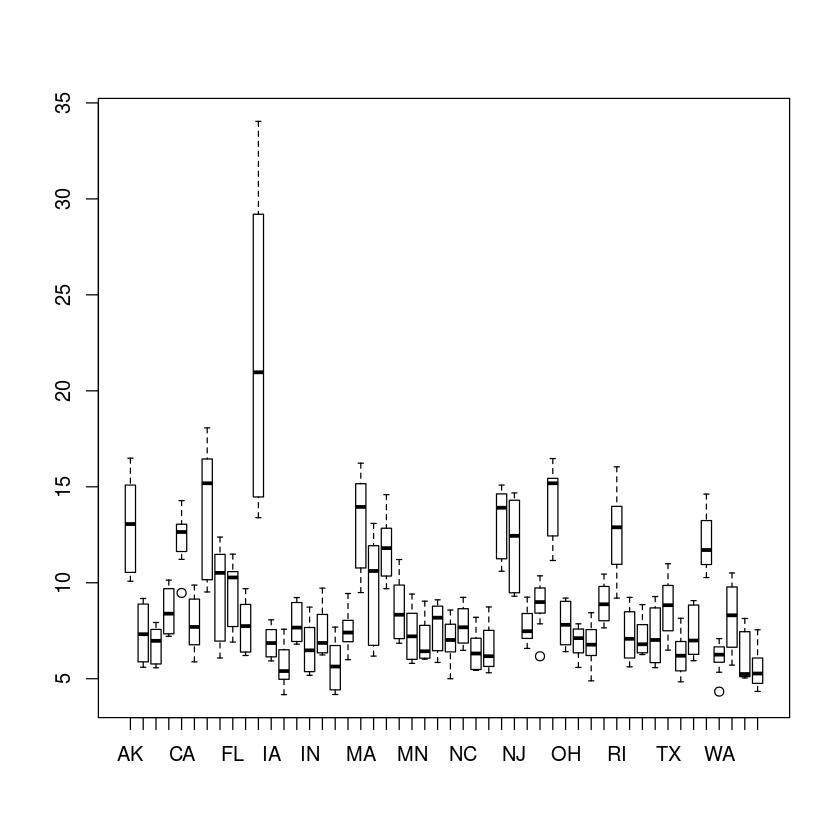

In [22]:
boxplot(energy$EPriceTotal ~ energy$STATE)

In [29]:
sort(tapply(energy$EPriceTotal, energy$STATE, mean))

WY        KY        ID        WV        WA        UT        ND        NE 
 5.510000  5.688571  5.689286  6.048571  6.157143  6.298571  6.431429  6.579286 
       IN        AR        OR        IA        MO        OK        MT        SD 
 6.644286  6.739286  6.849286  6.884286  6.934286  6.957143  7.048571  7.118571 
       MN        SC        TN        KS        AL        VA        LA        NC 
 7.298571  7.307143  7.312857  7.395714  7.399286  7.440000  7.509286  7.737857 
       NM        MS        CO        GA        OH        IL        WI        AZ 
 7.753571  7.759286  7.810000  7.846429  7.858571  7.861429  8.202857  8.507857 
       MI        TX        NV        PA        FL        DE        MD        ME 
 8.547143  8.709286  8.919286  8.941429  9.385000  9.536429  9.741429 11.645714 
       NJ        VT        CA        RI        NH        MA        AK        CT 
12.071429 12.094286 12.347143 12.511429 13.081429 13.112143 13.135714 13.815000 
       NY        HI 
14.165714 21.885714

In [30]:
sort(tapply(energy$GenTotal, energy$STATE, mean))

CA        MA        RI        NJ        NY        DE        MD        ID 
 5.576285  6.434295  6.488628  7.108700  7.197383  8.256761  8.352530  8.358471 
       HI        CT        VA        AK        VT        MN        CO        SD 
 8.623563  9.358409  9.720367  9.810218 10.177005 10.199283 10.367634 10.719863 
       WI        MI        FL        OH        ME        NC        GA        NV 
11.079302 11.201083 12.027089 12.664461 13.148792 13.915444 13.969187 14.311625 
       OR        TN        MO        IL        UT        NH        IA        MS 
14.537263 14.751132 15.062760 15.193858 15.587630 15.671056 16.270149 16.377409 
       WA        KS        TX        AZ        PA        NM        NE        OK 
16.426394 16.732968 17.020082 17.211604 17.326080 18.130563 18.470352 18.787146 
       AR        IN        LA        KY        SC        MT        AL        WV 
19.090133 19.664150 21.384516 22.399999 22.476570 28.942351 30.582000 47.417141 
       ND        WY 
49.909462 88.393083

In [32]:
library(caTools)
set.seed(144)
spl = sample(1:nrow(energy), size=0.7 * nrow(energy))
train = energy[spl,]
test = energy[-spl,]

In [35]:
mod = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial +
          CumlRegulatory + Total.salary + Import, data=train,
          family='binomial')
summary(mod)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0165  -0.4374  -0.2398  -0.0719   2.6342  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -6.345e+00  9.148e-01  -6.935 4.05e-12 ***
GenHydro       -3.652e+00  1.114e+00  -3.279  0.00104 ** 
GenSolar        1.076e+03  3.322e+02   3.238  0.00121 ** 
CumlFinancial   2.814e-02  9.563e-03   2.943  0.00325 ** 
CumlRegulatory  1.996e-01  5.045e-02   3.955 7.65e-05 ***
Total.salary    1.393e-01  4.465e-02   3.119  0.00181 ** 
Import         -3.142e-01  3.447e-01  -0.912  0.36190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 528.69  on 488  degrees of freedom
Residual deviance: 282.82  on 482  degrees of freedom
AIC: 296.82


In [38]:
pred = predict(mod, newdata = test, type='response')
thres = pred > 0.5
t = table(test$GenSolarBinary, thres)
t
sum(diag(t))/sum(t)

   thres
    FALSE TRUE
  0   154    7
  1    31   18

[1] 0.8190476

In [39]:
sub = subset(test, presidential.results==1)
pred = predict(mod, newdata = sub, type='response')
thres = pred > 0.5
t = table(sub$GenSolarBinary, thres)
t
sum(diag(t))/sum(t)

   thres
    FALSE TRUE
  0    64    7
  1    13   16

[1] 0.8

In [40]:
sub = subset(test, presidential.results==0)
pred = predict(mod, newdata = sub, type='response')
thres = pred > 0.5
t = table(sub$GenSolarBinary, thres)
t
sum(diag(t))/sum(t)

   thres
    FALSE TRUE
  0    90    0
  1    18    2

[1] 0.8363636

In [91]:
train.limited = train[,c('CumlRegulatory', 'CumlFinancial',
                         'presidential.results', 'Total.salary', 'Import')]
test.limited = test[,c('CumlRegulatory', 'CumlFinancial',
                       'presidential.results', 'Total.salary', 'Import')]

In [92]:
library(caret)
preproc = preProcess(train.limited)
train.norm = predict(preproc, train.limited)
test.norm = predict(preproc, test.limited)

In [127]:
set.seed(144)
kmc = kmeans(train.norm, centers = 2, iter.max = 1000)
#train.norm$cluster = kmc$cluster

library(flexclust)
kmc.kcca = as.kcca(kmc, train.norm)
cluster.train = predict(kmc.kcca)
#cluster.test = predict(as.kcca(kmc, test.norm), newdata = test.norm)
#cluster.train

In [132]:
set.seed(144)
kmc = kmeans(test.norm, centers = 2, iter.max = 1000)

library(flexclust)
kmc.kcca = as.kcca(kmc, test.norm)
cluster.test = predict(kmc.kcca)
#cluster.test = predict(as.kcca(kmc, test.norm), newdata = test.norm)
#cluster.train

In [133]:
train1 = train[cluster.train == 1,]
train2 = train[cluster.train == 2,]
test1 = test[cluster.test == 1,]
test2 = test[cluster.test == 2,]

In [134]:
mean(train1$presidential.results)
mean(train2$presidential.results)

[1] 0.1948052

[1] 0.8839779

In [135]:
mean(train1$CumlRegulatory)
mean(train1$CumlFinancial)
mean(train2$CumlRegulatory)
mean(train2$CumlFinancial)

[1] 3.983766

[1] 7.766234

[1] 12.28729

[1] 34.87845

In [136]:
mod1 = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial +
          CumlRegulatory + Total.salary + Import, data=train1,
          family='binomial')
summary(mod1)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8654  -0.2715  -0.1692  -0.1194   2.8802  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -7.574e+00  1.945e+00  -3.893 9.89e-05 ***
GenHydro       -1.201e+00  2.082e+00  -0.577  0.56398    
GenSolar        2.324e+04  1.104e+04   2.106  0.03524 *  
CumlFinancial   6.836e-02  2.159e-02   3.166  0.00154 ** 
CumlRegulatory  1.589e-01  1.145e-01   1.388  0.16521    
Total.salary    1.549e-01  9.190e-02   1.686  0.09188 .  
Import         -3.323e-01  9.628e-01  -0.345  0.72995    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 131.538  on 307  degrees of freedom
Residual deviance:  90.376  on 301  degrees of freedom
AIC: 104.

In [143]:
pred1 = predict(mod1, type='response', newdata = test1)
t = table(test1$GenSolarBinary, pred1 > 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0   111    1
  1    11    4

[1] 0.9055118

In [138]:
pred = predict(mod, type='response', newdata = test1)
t = table(test1$GenSolarBinary, pred > 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE
  0   112
  1    15

[1] 0.8818898

In [139]:
mod2 = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial +
          CumlRegulatory + Total.salary + Import, data=train2,
          family='binomial')
summary(mod2)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6321  -0.7964   0.0083   0.8536   1.7143  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -4.14627    1.43969  -2.880  0.00398 **
GenHydro        -3.88698    1.23196  -3.155  0.00160 **
GenSolar       951.59397  322.86360   2.947  0.00321 **
CumlFinancial    0.02077    0.01008   2.060  0.03939 * 
CumlRegulatory   0.17315    0.06541   2.647  0.00812 **
Total.salary     0.08472    0.05576   1.519  0.12869   
Import          -0.72189    0.40427  -1.786  0.07416 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 250.25  on 180  degrees of freedom
Residual deviance: 173.65  on 174  degrees of freedom
AIC: 187.65

Number of Fish

In [144]:
pred2 = predict(mod2, type='response', newdata = test2)
t = table(test2$GenSolarBinary, pred2 > 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0    43    6
  1    14   20

[1] 0.7590361

In [142]:
pred = predict(mod, type='response', newdata = test2)
t = table(test2$GenSolarBinary, pred > 0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0    42    7
  1    16   18

[1] 0.7228916

In [155]:
#predall = 
#cbind(pred1, pred2)
predall = c(as.vector(pred1), as.vector(pred2))
outcome = c(test1$GenSolarBinary, test2$GenSolarBinary)
t = table(outcome, predall > 0.5)
t
sum(diag(t))/sum(t)

       
outcome FALSE TRUE
      0   154    7
      1    25   24

[1] 0.847619